In [69]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_csv('/data/npi_2013_clean1.csv')

/home/ubuntu/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
keep_cols = df.columns[8:]

In [18]:
X_train, X_test = train_test_split(df[keep_cols], test_size=.3, random_state=5)

In [19]:
mod_if = IsolationForest(random_state=5, verbose=True)

In [20]:
mod_if.get_params()

{'bootstrap': False,
 'max_features': 1.0,
 'max_samples': 'auto',
 'n_estimators': 100,
 'n_jobs': 1,
 'random_state': 5,
 'verbose': True}

In [21]:
mod_if.fit(X_train)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.3min finished


IsolationForest(bootstrap=False, max_features=1.0, max_samples='auto',
        n_estimators=100, n_jobs=1, random_state=5, verbose=True)

In [42]:
preds = np.array(mod_if.predict(X_test))

In [43]:
sorted(preds, reverse=True)

[0.76822916323833446,
 0.76719111220177183,
 0.76563666500699434,
 0.76563666500699434,
 0.76511921615727052,
 0.76202185877119577,
 0.7615068529566793,
 0.76099219520434236,
 0.76099219520434236,
 0.76047788527895011,
 0.75945030796885538,
 0.75917272776622546,
 0.75865964751200232,
 0.75842411914769459,
 0.75739931693930573,
 0.75739931693930573,
 0.75688743522929347,
 0.75637589947006201,
 0.75586470942780337,
 0.75586470942780337,
 0.75586470942780337,
 0.75535386486886802,
 0.75486480545341916,
 0.75433321126715691,
 0.75382340175787077,
 0.75331393679888659,
 0.75280481615734318,
 0.75229603960053648,
 0.75178760689591995,
 0.75077177211385615,
 0.75077177211385615,
 0.74947398250973651,
 0.74925059302755115,
 0.74889329205713651,
 0.74874421856138895,
 0.74796470416827865,
 0.7477324960840469,
 0.7477324960840469,
 0.74748875659494407,
 0.74745919875886579,
 0.74722714761043862,
 0.74722714761043862,
 0.74672214067218035,
 0.74621747503844837,
 0.74544059122717765,
 0.7452975364

In [47]:
df1 = pd.DataFrame(preds)

In [63]:
df1[df1>.7].count()

0    653
dtype: int64

In [61]:
df1.shape

(314815, 1)

In [64]:
653./314815

0.0020742340739799566

In [66]:
X_test['prediction'] = preds

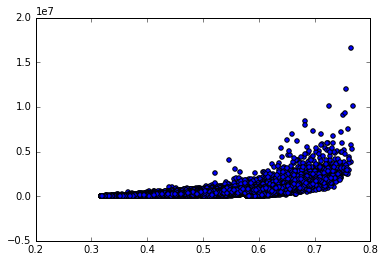

In [70]:
plt.scatter(X_test['prediction'], X_test['total_drug_cost'])

In [71]:
X_test[X_test['prediction']>.6].describe().T

,count,mean,std,min,25%,50%,75%,max
bene_count,8313,492.359978,503.372848,5.500000,167.000000,465.000000,694.000000,24164.000000
total_claim_count,8313,11138.212438,10881.092920,12.000000,1295.000000,9742.000000,17647.000000,191530.000000
total_drug_cost,8313,1024218.109728,742165.810884,14185.800000,635572.120000,916506.850000,1233138.770000,16602543.110000
total_day_supply,8313,388825.916396,352558.607557,360.000000,41423.000000,339939.000000,641385.000000,4339456.000000
brand_claim_count,8313,2663.534163,2976.878294,5.500000,105.000000,2366.000000,4021.000000,50199.000000
brand_claim_cost,8313,699032.432189,699763.713982,686.250991,272941.400000,619645.830000,900017.910000,15363456.740000
generic_claim_count,8313,8247.761879,8251.097187,0.000000,931.000000,6654.000000,13412.000000,141427.000000
generic_claim_cost,8313,198880.132965,182105.445453,0.000000,40073.750000,183209.930000,300979.220000,3272082.730000
other_claim_count,8313,117.827138,170.124776,0.000000,5.500000,71.000000,170.000000,2870.000000
other_claim_cost,8313,3453.667456,5333.025162,0.000000,211.378599,1784.460000,4818.530000,76750.420000


In [72]:
X_test[X_test['prediction']<.6].describe().T

,count,mean,std,min,25%,50%,75%,max
bene_count,306502,114.572075,147.334700,5.500000,19.000000,55.000000,156.000000,5820.000000
total_claim_count,306502,1044.189255,2119.091046,11.000000,47.000000,171.000000,845.000000,23322.000000
total_drug_cost,306502,73987.013937,147134.870756,15.880000,1470.925000,8139.605000,67379.210000,4012496.850000
total_day_supply,306502,41246.914555,89822.219251,11.000000,848.000000,3807.000000,29013.750000,838660.000000
brand_claim_count,306502,198.261116,477.733788,0.000000,5.500000,5.500000,84.000000,6143.000000
brand_claim_cost,306502,43798.294514,105752.929931,0.000000,996.322243,1490.856703,19185.870000,4010381.620000
generic_claim_count,306502,783.883975,1658.194901,0.000000,5.500000,114.000000,598.000000,18134.000000
generic_claim_cost,306502,19441.765307,39882.182742,0.000000,139.655981,2331.225000,16405.700000,533723.470000
other_claim_count,306502,8.844990,23.658738,0.000000,0.000000,0.000000,5.500000,680.000000
other_claim_cost,306502,264.437347,957.675896,0.000000,0.000000,0.000000,160.288469,263386.800000
